<a href="https://colab.research.google.com/github/gitekarkashish/Assignment-CST/blob/main/cst_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo seaborn matplotlib --quiet

1.	From the attached data set, visualise the data set and find the correlation between the features.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [ ]:
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
correlation_matrix = X.corr()

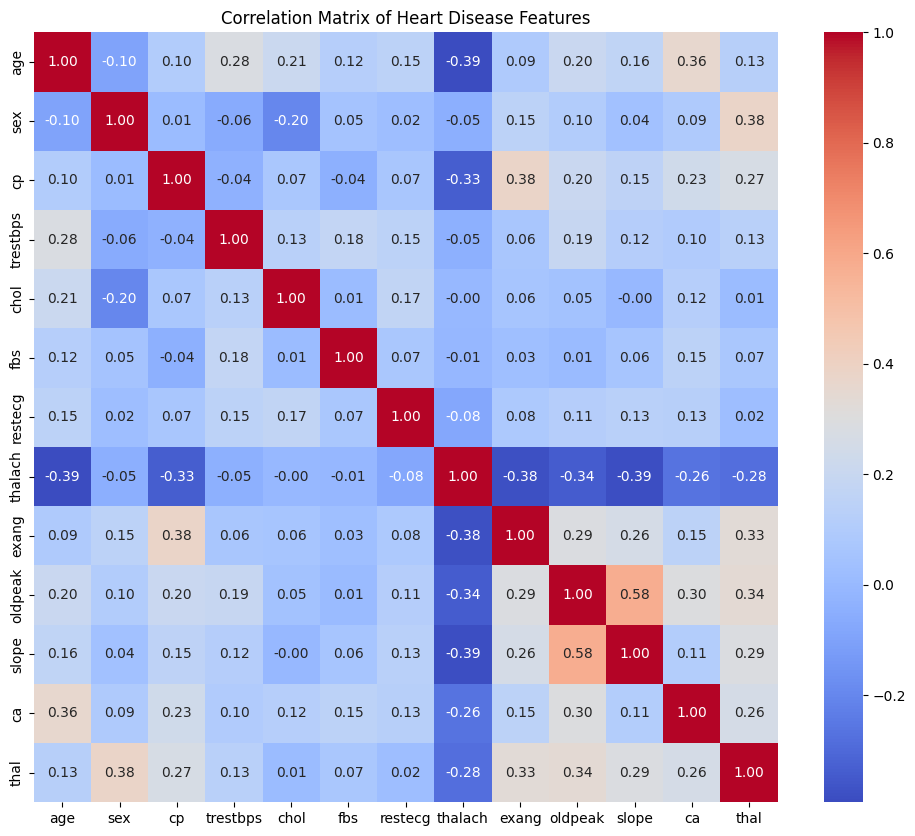

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()

2.	Apply the multiple linear regression and generate the regression model. find out its parameter and check whether the estimate estimated parameters are correct or not.

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')  # or strategy='median'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features (for the intercept term)
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the model summary (including parameters)
print(model.summary())

# Get the estimated parameters
parameters = model.params
print("\nEstimated Parameters:")
print(parameters)

# Check for statistical significance
print("\nStatistically Significant Parameters (p-value < 0.05):")
for param, p_value in zip(parameters.index, model.pvalues):
    if p_value < 0.05:
        print(f"{param}: {parameters[param]} (p-value = {p_value:.3f})")

                            OLS Regression Results                            
Dep. Variable:                    num   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     22.32
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           8.12e-34
Time:                        04:50:46   Log-Likelihood:                -289.54
No. Observations:                 242   AIC:                             607.1
Df Residuals:                     228   BIC:                             655.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3719      0.851     -1.611      0.1

3.	For the attached data set, check whether multi collinearity exists in your data set or not

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np  # Import numpy for isfinite and nan_to_num

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Replace infinite values with a large finite number and NaNs with 0
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
# or
# X = np.nan_to_num(X) # Replaces inf, -inf with large finite number, NaNs with 0

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print(vif_data)

     feature        VIF
0        age  42.473684
1        sex   3.850726
2         cp  13.548154
3   trestbps  60.767971
4       chol  26.401603
5        fbs   1.247230
6    restecg   2.153010
7    thalach  34.656412
8      exang   2.047061
9    oldpeak   3.131309
10     slope  11.787380
11        ca   2.030601
12      thal  10.031243


4.	For the attached data set, check whether non-normality exists in your data set or not.

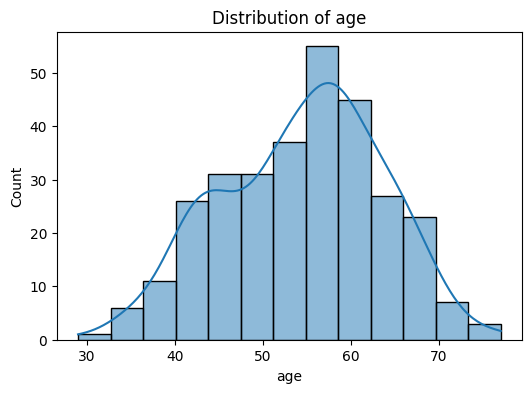

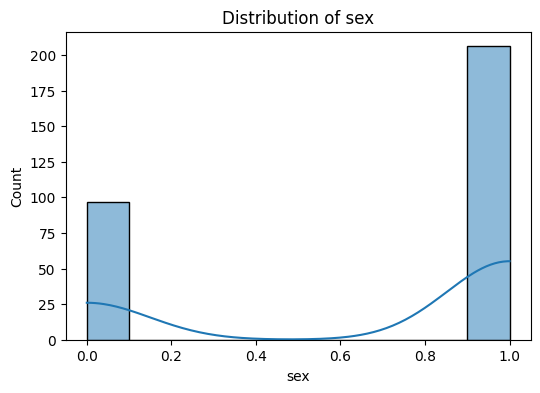

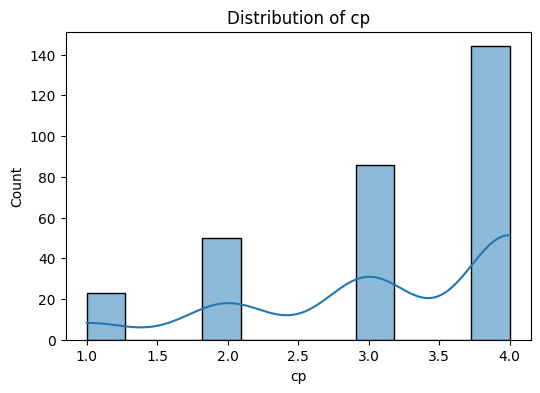

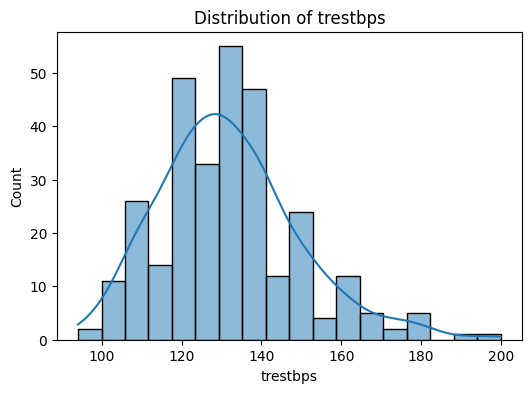

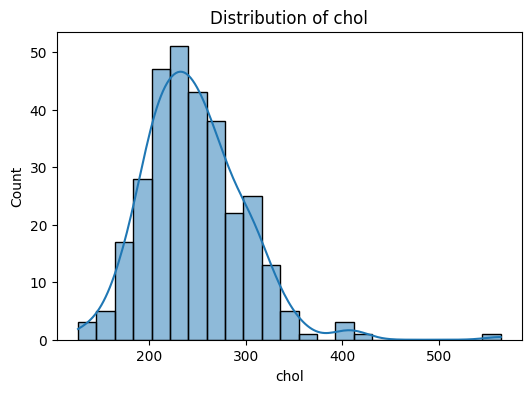

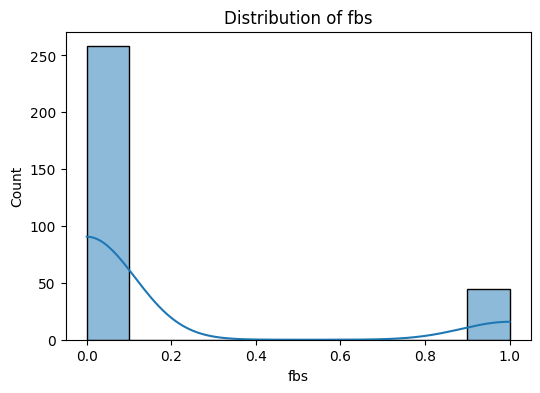

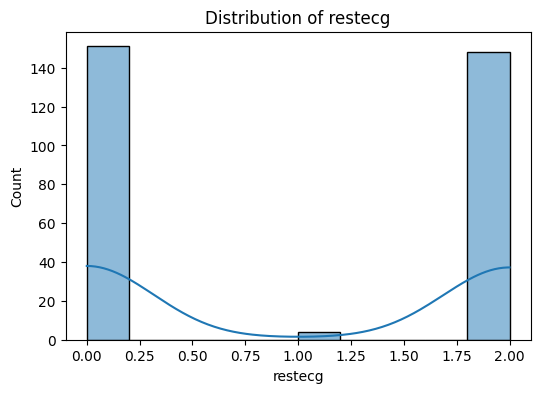

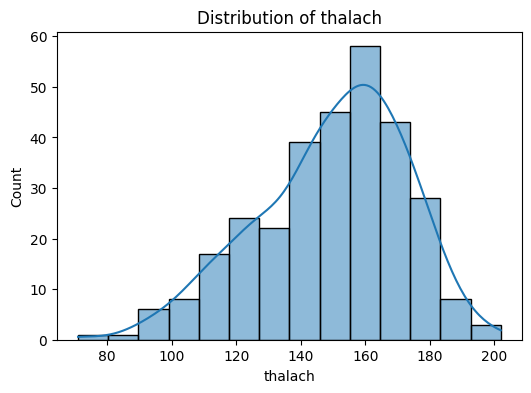

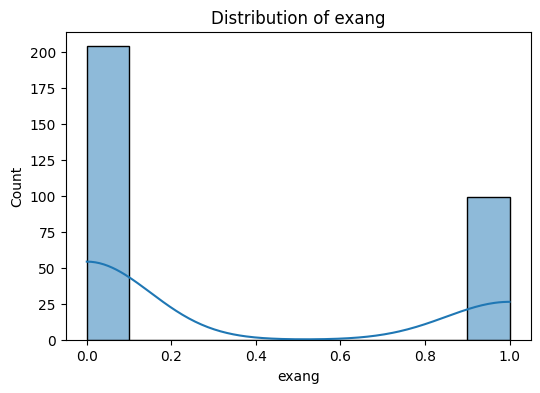

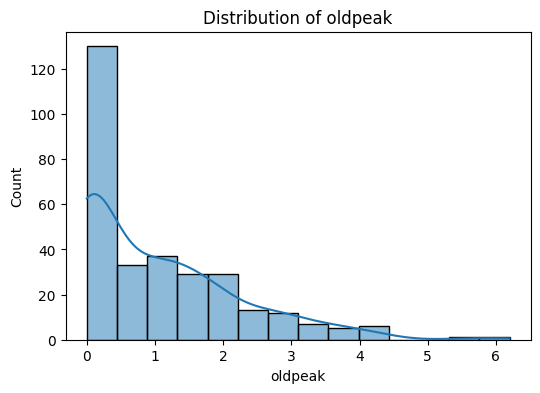

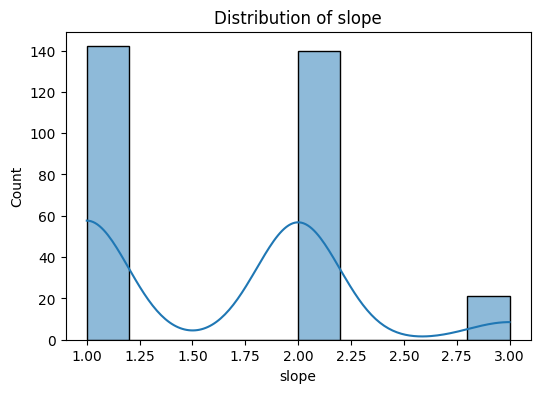

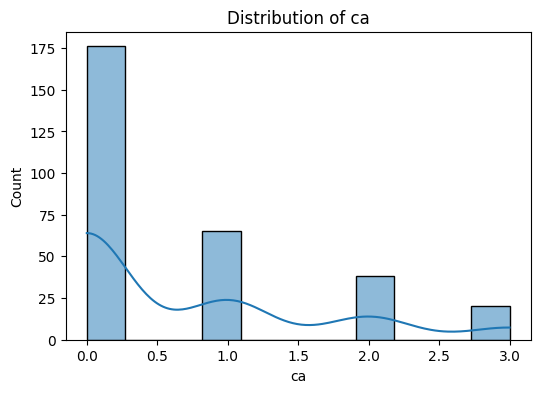

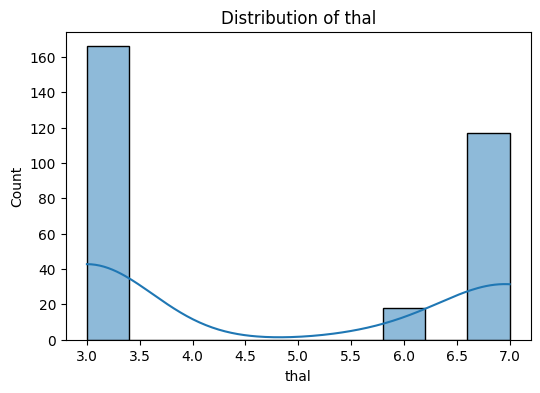

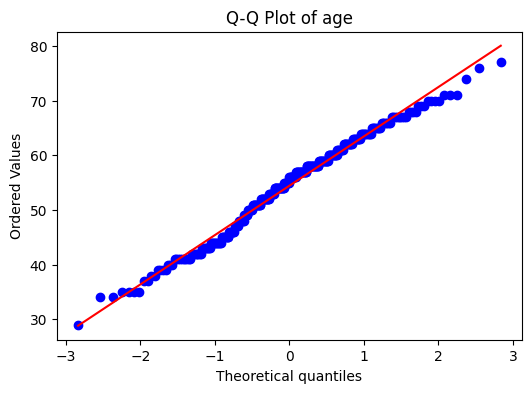

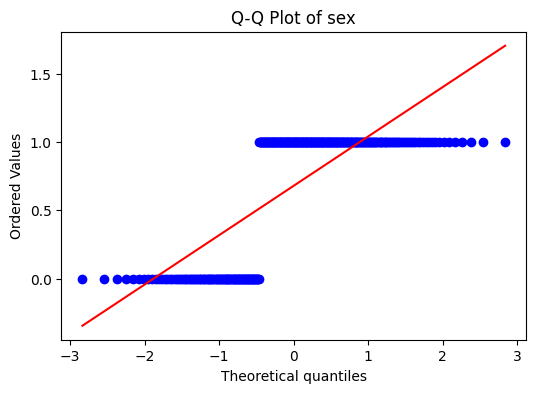

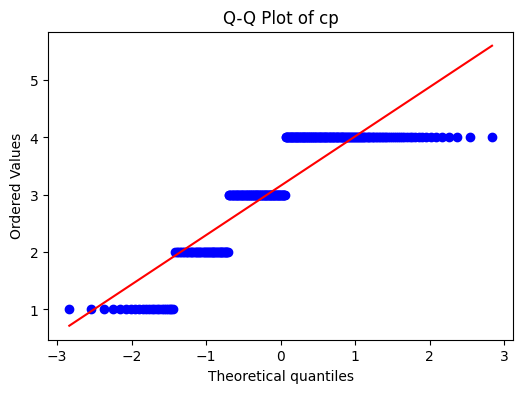

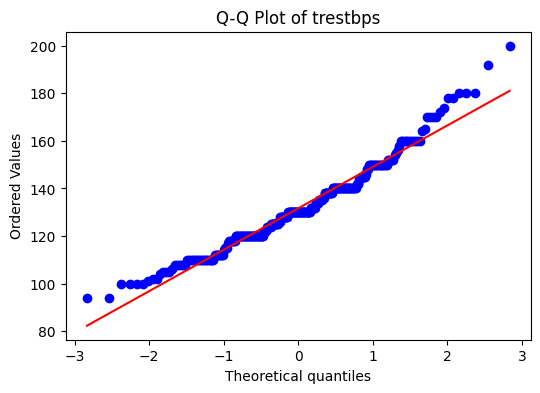

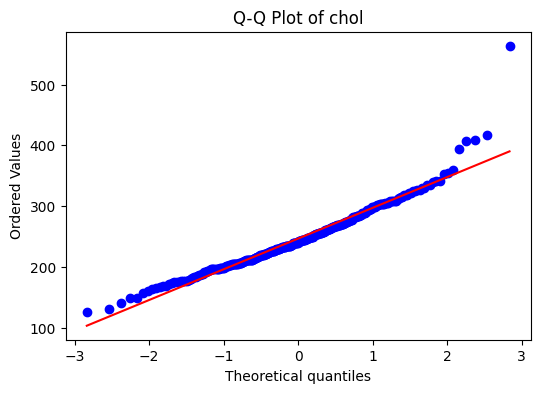

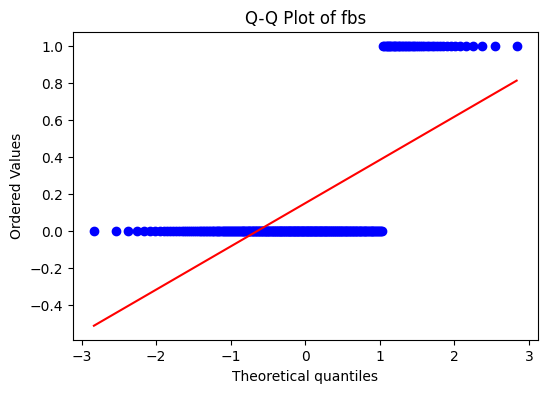

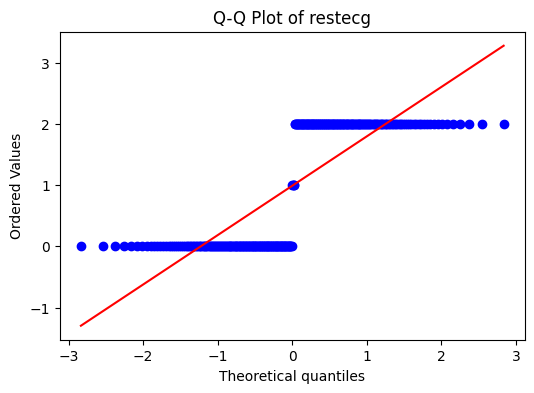

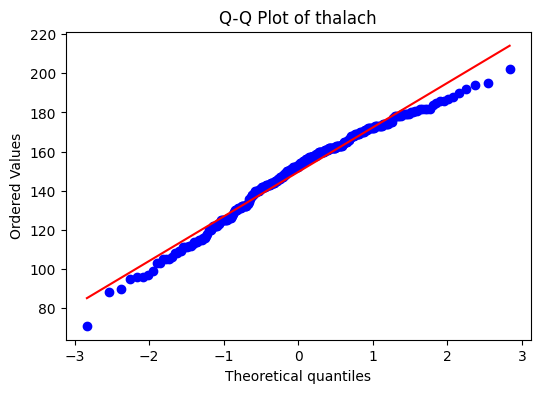

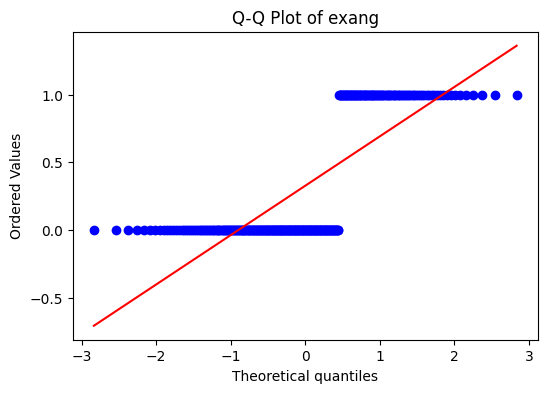

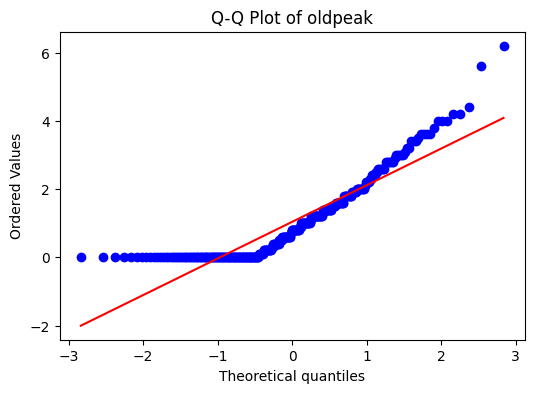

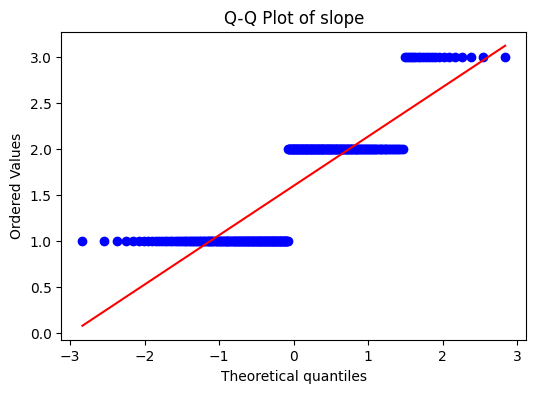

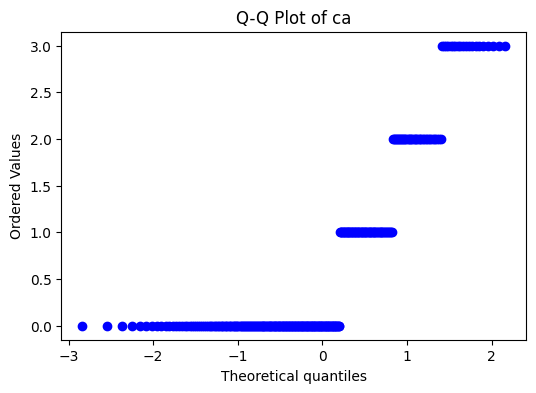

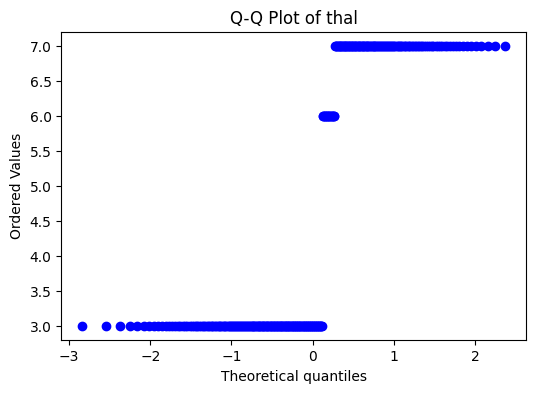

Shapiro-Wilk Test for age:
Statistic: 0.986, p-value: 0.006
 => age is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for sex:
Statistic: 0.588, p-value: 0.000
 => sex is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for cp:
Statistic: 0.791, p-value: 0.000
 => cp is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for trestbps:
Statistic: 0.967, p-value: 0.000
 => trestbps is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for chol:
Statistic: 0.947, p-value: 0.000
 => chol is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for fbs:
Statistic: 0.424, p-value: 0.000
 => fbs is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for restecg:
Statistic: 0.645, p-value: 0.000
 => restecg is likely not normally distributed.
------------------------------
Shapiro-Wilk Test for thalach:
Statis

In [ ]:
!pip install ucimlrepo seaborn matplotlib scipy
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# 1. Visual Inspection: Histograms and Q-Q Plots

# Plot histograms for numerical features
numerical_features = X.select_dtypes(include=['number']).columns
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Plot Q-Q plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    stats.probplot(X[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()

# 2. Statistical Tests: Shapiro-Wilk Test

# Perform Shapiro-Wilk test for normality
for feature in numerical_features:
    statistic, p_value = stats.shapiro(X[feature])
    print(f"Shapiro-Wilk Test for {feature}:")
    print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")
    if p_value < 0.05:
        print(f" => {feature} is likely not normally distributed.")
    else:
        print(f" => {feature} may be normally distributed.")
    print("-" * 30)

13.	Apply LDA on the attached data set and find out the first appropriate direction or the first axis.

In [ ]:
!pip install ucimlrepo scikit-learn
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# 1. Data Preprocessing:

# Handle missing values (if any) - replace with mean for now
# (You might want to explore more sophisticated imputation techniques)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features (important for LDA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply LDA:

lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1 dimension
X_lda = lda.fit_transform(X_scaled, y)

# 3. Get the First Discriminant Direction (First Axis):

first_direction = lda.scalings_[:, 0]  # Get the coefficients for the first axis

# Print the first direction (coefficients):
print("First Discriminant Direction (First Axis):")
for feature, coefficient in zip(X.columns, first_direction):
    print(f"{feature}: {coefficient:.3f}")

First Discriminant Direction (First Axis):
age: -0.100
sex: 0.197
cp: 0.349
trestbps: 0.128
chol: 0.056
fbs: -0.029
restecg: 0.121
thalach: -0.243
exang: 0.250
oldpeak: 0.305
slope: 0.163
ca: 0.629
thal: 0.463


<ipython-input-33-5fefcc4ba12b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14.	Quantize the dependent variable of the data set and make them discrete. Apply LDA over the dataset and build the classifier

In [ ]:
!pip install ucimlrepo scikit-learn pandas numpy
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# 1. Quantize the Dependent Variable:

# Assuming 'num' is the dependent variable and we want to make it binary
# Values greater than 0 will be considered as 1 (presence of heart disease)
y['num'] = (y['num'] > 0).astype(int)

# 2. Data Preprocessing:

# Handle missing values (if any) - replace with mean
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split Data into Training and Testing Sets:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Apply LDA and Build the Classifier:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.values.ravel())  # Ravel y_train to 1D array

# 5. Make Predictions and Evaluate:

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


<ipython-input-34-382ce8965b7f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = (y['num'] > 0).astype(int)
<ipython-input-34-382ce8965b7f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())


17.	What criteria can be used to decide how many principal components to retain in an analysis?

<ipython-input-35-0d02ed508f6b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())


Kaiser's Rule: Retain 4 components


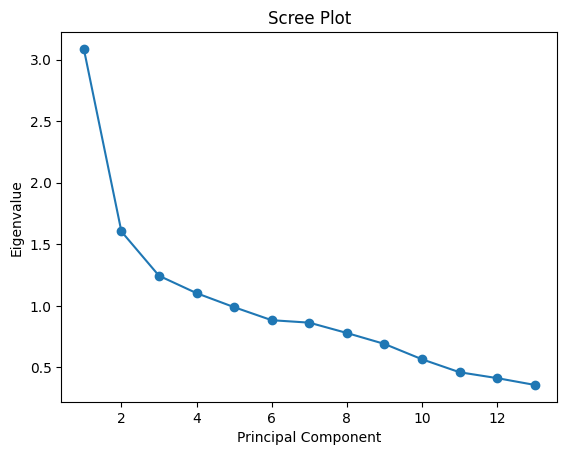

Proportion of Variance Explained (95%): Retain 12 components


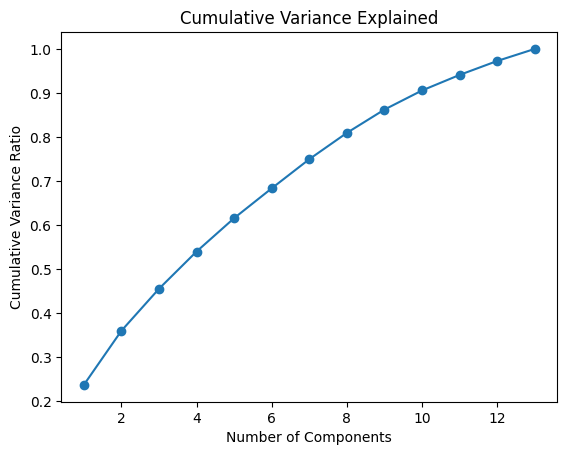

In [ ]:
!pip install ucimlrepo scikit-learn matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features

# Handle missing values (if any)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Kaiser's Rule:
eigenvalues = pca.explained_variance_
num_components_kaiser = np.sum(eigenvalues > 1)
print(f"Kaiser's Rule: Retain {num_components_kaiser} components")

# 2. Scree Plot:
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()  # Visually identify the elbow point

# 3. Proportion of Variance Explained:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of variance
num_components_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Proportion of Variance Explained (95%): Retain {num_components_variance} components")

# You can also plot the cumulative variance explained:
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

19.	Compare and contrast PCA with other dimensionality reduction techniques.

Kaiser's Rule: Retain 4 components


<ipython-input-36-0d02ed508f6b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())


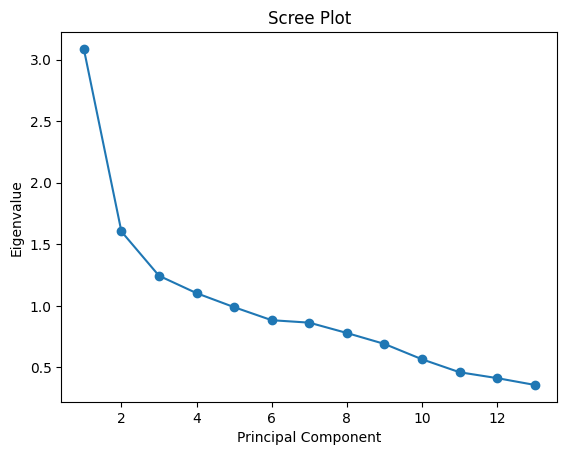

Proportion of Variance Explained (95%): Retain 12 components


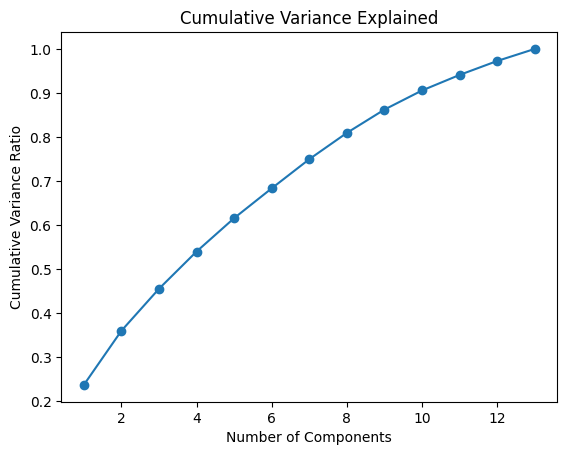

In [ ]:
!pip install ucimlrepo scikit-learn matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features

# Handle missing values (if any)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. Kaiser's Rule:
eigenvalues = pca.explained_variance_
num_components_kaiser = np.sum(eigenvalues > 1)
print(f"Kaiser's Rule: Retain {num_components_kaiser} components")

# 2. Scree Plot:
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()  # Visually identify the elbow point

# 3. Proportion of Variance Explained:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of variance
num_components_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Proportion of Variance Explained (95%): Retain {num_components_variance} components")

# You can also plot the cumulative variance explained:
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

21.	Compare the performance of models with different number of dimensions.

In [ ]:
!pip install ucimlrepo scikit-learn pandas numpy matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Assuming 'num' is the dependent variable and we want to make it binary
y['num'] = (y['num'] > 0).astype(int)

# Handle missing values (

<ipython-input-37-b8ec512eb735>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = (y['num'] > 0).astype(int)


20.	Apply the principal component model on the attached and find out the appropriate number of dimensions.

Kaiser's Rule: Retain 4 components


<ipython-input-39-96bb097bf29d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())


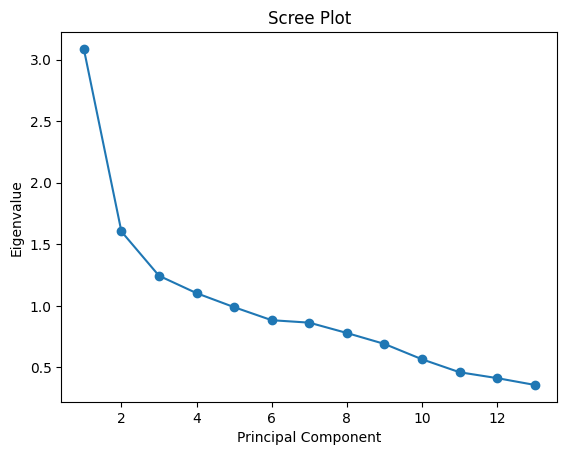

Proportion of Variance Explained (95%): Retain 12 components


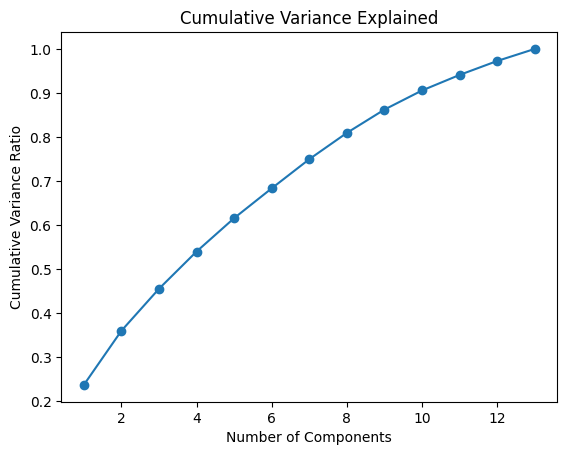

In [ ]:
!pip install ucimlrepo scikit-learn pandas numpy matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features

# Handle missing values (if any)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()  # Initialize PCA without specifying n_components to get all components
X_pca = pca.fit_transform(X_scaled)

# 1. Kaiser's Rule:
eigenvalues = pca.explained_variance_
num_components_kaiser = np.sum(eigenvalues > 1)
print(f"Kaiser's Rule: Retain {num_components_kaiser} components")

# 2. Scree Plot:
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()  # Visually identify the elbow point

# 3. Proportion of Variance Explained:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the number of components that explain 95% of variance
num_components_variance = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Proportion of Variance Explained (95%): Retain {num_components_variance} components")

# You can also plot the cumulative variance explained:
plt.plot(np.arange(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.show()

22.	Apply factor model on the same data set.

In [ ]:
!pip install ucimlrepo factor_analyzer scikit-learn pandas numpy matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
!pip install ucimlrepo factor_analyzer scikit-learn pandas numpy matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=afd5984a163c2b92a8b1e86bc0f341c2ad86ebdab4f108ba7a7e831af6258b6a
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


28.	Using the same data set apply k means clustering. Remember you must reject the dependent variable.

<ipython-input-43-72d09185e56d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mean())


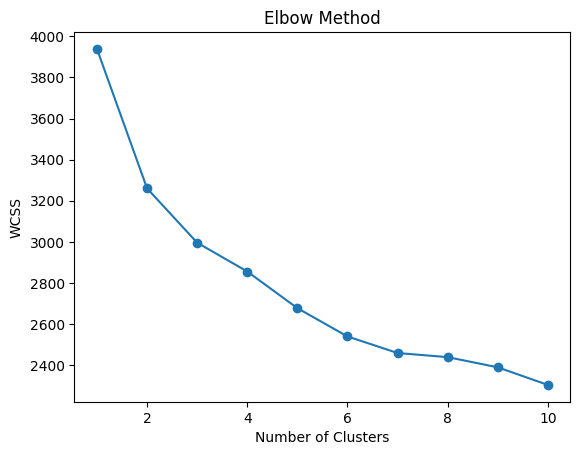

               age       sex        cp    trestbps        chol       fbs  \
cluster                                                                    
0        58.173913  0.817391  3.773913  134.904348  254.226087  0.200000   
1        52.154255  0.595745  2.781915  129.723404  242.085106  0.117021   

          restecg     thalach     exang   oldpeak     slope        ca  \
cluster                                                                 
0        1.208696  133.147826  0.678261  1.866957  1.965217  1.249324   
1        0.856383  159.675532  0.111702  0.533511  1.377660  0.319238   

             thal  
cluster            
0        6.154211  
1        3.865608  


In [ ]:
!pip install ucimlrepo scikit-learn pandas numpy matplotlib
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features  # Independent variables
y = heart_disease.data.targets  # Dependent variable

# Handle missing values (if any) - replace with mean for now
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (using the Elbow method)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  # Visually identify the elbow point

# Apply K-means with the optimal number of clusters (e.g., 2 or 3 based on the elbow point)
optimal_num_clusters = 2  # or 3 or whatever you choose from the elbow method
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
X['cluster'] = clusters

# Analyze the clusters (e.g., calculate cluster means for each feature)
cluster_means = X.groupby('cluster').mean()
print(cluster_means)

# You can further analyze the clusters based on their characteristics
# and compare them to the original dependent variable (y) if desired.